In [2]:
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
x =np.reshape([2,4,11,5,3,4,5,12,3,8,2,6,2,2,12,3,10,9,14,5,10,2,14,12,2],(5,5))
print len(np.unique(x))

11


In [4]:
y = np.bincount(x.reshape((25,)))
ii = np.nonzero(y)[0]

In [5]:
a = pd.Series(ii,name='value')
b = pd.Series(y[ii],name='Count')
df = pd.concat([a,b],axis=1)
df

,value,Count
0,2,6
1,3,3
2,4,2
3,5,3
4,6,1
5,8,1
6,9,1
7,10,2
8,11,1
9,12,3


#a)
Draw the histogram of this image

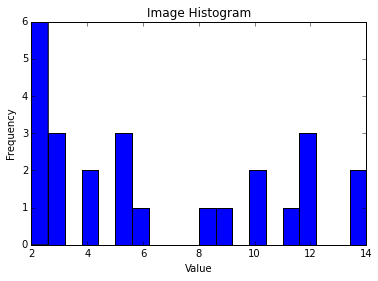

In [6]:
plt.hist(x.reshape((25,)),bins=20)
plt.title("Image Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.xlim(np.min(x),np.max(x))

fig = plt.gcf()
plt.show()


#b)
Find the output of HE and draw the histogram of equalized image

In [7]:
table = zip(ii,y[ii])
p =map(lambda x:x[1]/float(25),table)
cdf = []
for i in range (len(p)):
    cdf.append(sum(p[:i+1]))
p =pd.Series(p,name='Probablitiy').to_frame()
cdf = pd.Series(cdf,name='CDF').to_frame()
df = df.join([p,cdf])
df
#table = zip(ii,y[ii],p,cdf)
#table

,value,Count,Probablitiy,CDF
0,2,6,0.24,0.24
1,3,3,0.12,0.36
2,4,2,0.08,0.44
3,5,3,0.12,0.56
4,6,1,0.04,0.60
5,8,1,0.04,0.64
6,9,1,0.04,0.68
7,10,2,0.08,0.76
8,11,1,0.04,0.80
9,12,3,0.12,0.92


In [8]:
df['HE'] = (((df.CDF-df.CDF.min())/(1-df.CDF.min())) *15).round()

In [9]:
df

,value,Count,Probablitiy,CDF,HE
0,2,6,0.24,0.24,0
1,3,3,0.12,0.36,2
2,4,2,0.08,0.44,4
3,5,3,0.12,0.56,6
4,6,1,0.04,0.60,7
5,8,1,0.04,0.64,8
6,9,1,0.04,0.68,9
7,10,2,0.08,0.76,10
8,11,1,0.04,0.80,11
9,12,3,0.12,0.92,13


In [10]:
Eimg = map(lambda x:df[df.value==x].HE.values[0],x.reshape((25,)))

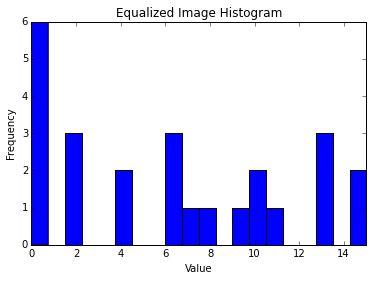

In [11]:
plt.hist(Eimg,bins=20)
plt.title("Equalized Image Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.xlim(np.min(Eimg),np.max(Eimg))

fig = plt.gcf()
plt.show()

#c)
If the equalized image in subject to compression by () Find the average length of the compression image.

In [12]:
Ey = np.bincount(Eimg)
Eii = np.nonzero(Ey)[0]
Ea = pd.Series(Eii,name='value')
Eb = pd.Series(Ey[Eii],name='Count')
Edf = pd.concat([Ea,Eb],axis=1)
Edf['Pr'] = Edf['Count']/25
Edf = Edf.sort('Count',ascending=False)
Edf

,value,Count,Pr
0,0,6,0.24
1,2,3,0.12
3,6,3,0.12
9,13,3,0.12
2,4,2,0.08
7,10,2,0.08
10,15,2,0.08
4,7,1,0.04
5,8,1,0.04
6,9,1,0.04


In [13]:
Ey = np.bincount(Eimg)
Eii = np.nonzero(Ey)[0]
Ea = pd.Series(Eii,name='value')
Eb = pd.Series(Ey[Eii],name='Count')
Edf = pd.concat([Ea,Eb],axis=1)
Edf['Pr'] = Edf['Count']/25
Edf = Edf.sort('Count',ascending=False)
Edf['Code_Length']= pd.Series([2,3,3,3,3,4,4,5,5,5,5])
Edf

,value,Count,Pr,Code_Length
0,0,6,0.24,2
1,2,3,0.12,3
3,6,3,0.12,3
9,13,3,0.12,5
2,4,2,0.08,3
7,10,2,0.08,5
10,15,2,0.08,5
4,7,1,0.04,3
5,8,1,0.04,4
6,9,1,0.04,4


In [14]:
sum( Edf['Pr']*Edf['Code_Length'])

3.4800000000000004

#d)
if a 3X3 laplacian with isotropy of 45 degree is applied to the pixel indicated in the circul of the equalized image find the new value.

In [15]:
eimgnp = np.reshape(Eimg,(5,5))
eimgnp

array([[  0.,   4.,  11.,   6.,   2.],
       [  4.,   6.,  13.,   2.,   8.],
       [  0.,   7.,   0.,   0.,  13.],
       [  2.,  10.,   9.,  15.,   6.],
       [ 10.,   0.,  15.,  13.,   0.]])

In [16]:
laplacian = np.reshape([1,1,1,1,-8,1,1,1,1],(3,3))
imageImportantMatrix = np.reshape([6,13,2,7,0,0,10,9,15],(3,3))

In [17]:
print laplacian
print '============'
print imageImportantMatrix

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]]
[[ 6 13  2]
 [ 7  0  0]
 [10  9 15]]


Since we used negative center then we substract : 

In [27]:
imageImportantMatrix[1,1]- (np.sum(laplacian*imageImportantMatrix))

-62